# 2015 flight delay and cancellation in USA analysis 

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [9]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')

airlines
airports # How many airports in USA

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [10]:
flights # how many flights in USA in 2015

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

F:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


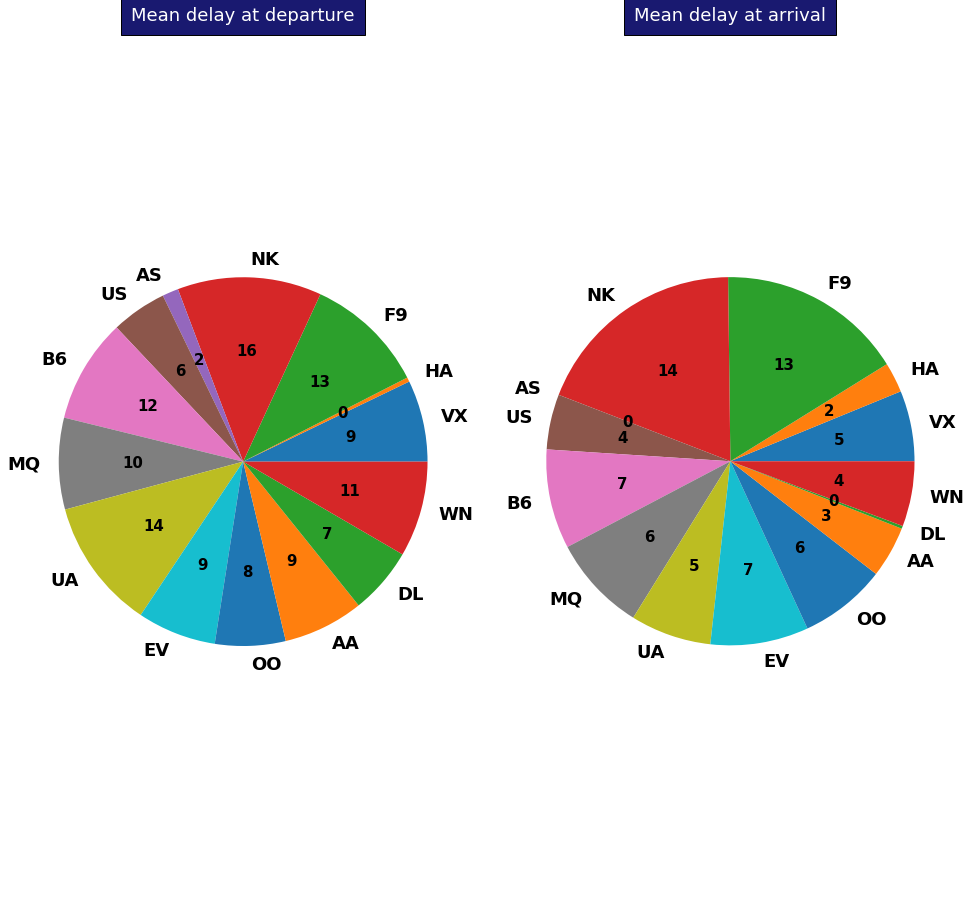

In [28]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches

fg2 = flights.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
fg2['AIRLINE'] = fg2['AIRLINE'].replace(abbr_companies)
fig = plt.figure(1, figsize=(16,16))
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 

global_stats_d=flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')

global_stats_a=flights['ARRIVAL_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats_a=global_stats_a.sort_values('count')
#----------------------------------------
# Pie chart1: mean delay at departure
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Mean delay at departure', bbox={'facecolor':'midnightblue', 'pad':10},
              color='w', fontsize=18)

#----------------------------------------
# Pie chart2: mean delay at arrival
#----------------------------------------
labels = [s for s in  global_stats_a.index]
sizes  = global_stats_a['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0,
                                     autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(18)
ax2.axis('equal')
ax2.set_title('Mean delay at arrival', bbox={'facecolor':'midnightblue', 'pad':10},
              color='w', fontsize=18)
plt.show()

In [18]:
airlines # information of the abbreviated flight in the pie chart

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


### From two pie charts, it can be found out that Spirit Air Lines has the highest mean delay time up to 30min in total, followed by  Frontier Airlines Inc. has 26min. The Alaska Airlines Inc., Hawaiian Airlines Inc. have lowst mean delay.

In [33]:
flights_v1 = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
flights_v1.drop('IATA_CODE', axis=1, inplace=True)
flights_v1.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

airline_rank_v01 = pd.DataFrame({'flight_volume' : flights_v1.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()}).reset_index()
airline_rank_v01.sort_values("flight_volume", ascending=True, inplace=True)
flight_volume_total = airline_rank_v01['flight_volume'].sum()
airline_rank_v01['flight_pcnt'] = airline_rank_v01['flight_volume']/flight_volume_total
airline_rank_v02 = pd.DataFrame({'cancellation_rate' : flights_v1.groupby(['AIRLINE'])['CANCELLED'].mean()}).reset_index()
airline_rank_v02.sort_values("cancellation_rate", ascending=False, inplace=True)
airline_rank_v03 = pd.DataFrame({'divertion_rate' : flights_v1.groupby(['AIRLINE'])['DIVERTED'].mean()}).reset_index()
airline_rank_v03.sort_values("divertion_rate", ascending=False, inplace=True)
airline_rank_v1 = pd.merge(airline_rank_v01, airline_rank_v02, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v03, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_rank_v1

,AIRLINE,flight_volume,flight_pcnt,cancellation_rate,divertion_rate
0,Virgin America,61903,0.010638,0.008626,0.001955
1,Hawaiian Airlines Inc.,76272,0.013107,0.002242,0.000787
2,Frontier Airlines Inc.,90836,0.015610,0.006473,0.001739
3,Spirit Air Lines,117379,0.020171,0.017073,0.001551
4,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394
5,US Airways Inc.,198715,0.034149,0.020466,0.002139
6,JetBlue Airways,267048,0.045892,0.016012,0.002734
7,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
8,United Air Lines Inc.,515723,0.088626,0.012745,0.002691
9,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486


F:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


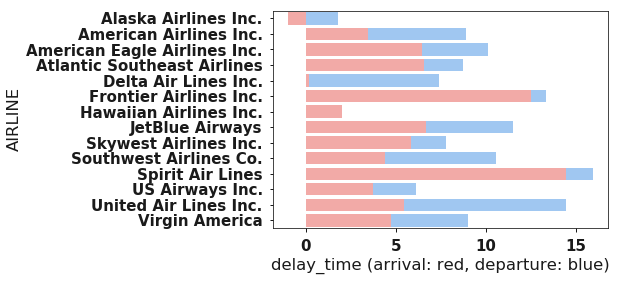

In [37]:

airline_rank_v07 = pd.DataFrame({'avg_arrival_delay' : flights_v1.groupby(['AIRLINE'])['ARRIVAL_DELAY'].mean()}).reset_index()
airline_rank_v08 = pd.DataFrame({'avg_departure_delay' : flights_v1.groupby(['AIRLINE'])['DEPARTURE_DELAY'].mean()}).reset_index()
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v07, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v08, left_on='AIRLINE', right_on='AIRLINE', how='left')
ax = sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="avg_departure_delay", y="AIRLINE", data=airline_rank_v08,
            label="accuracy", color="b")
ax = sns.barplot(x="avg_arrival_delay", y="AIRLINE", data=airline_rank_v07,
            label="accuracy", color="r")
ax.set(xlabel="delay_time (arrival: red, departure: blue)")
plt.show()

### Based on this analysis, looks like all the lines have longer departure delays than arrival delays, except for Hawwaiian Airlines. My intuition is that the flights can adjust speed to catch up time while departure delay sometimes are out of control.

### Spirit Airlines and Frontier Airlines are among the longest arrival and departure delay airlines. It is worth noting that Alaska Airlines is the only airline among all to arrive the destination earlier than scheduled in average.

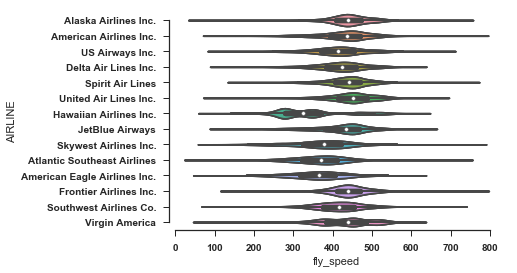

In [40]:
# Following the above asumption, I did research on the flight speed 
flights_v1['fly_speed'] = 60*flights_v1['DISTANCE']/flights_v1['AIR_TIME']
sns.set_context("notebook", font_scale=2.5)
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.violinplot(x="fly_speed", y="AIRLINE", data=flights_v1);
sns.despine(trim=True)
plt.show()

### Based on the violinplot, in average, the majority of flying speed accross airlines are close to 400~450 miles per hour; with the Hawaiian Airlines Inc. is the slowest airline and also large variation (looking at the data shape distribution). Due to its slow speed, maybe this is the reason Hawaiian Airlines would take off in advance to avoid any emergencies.

### In some rare cases, an aircraft can go as high as 800 miles per hour in average during a flight trip. United Airlines seems the fastest, while Hawaiian Airlines seems at the bottom.